# Project: League of Legends Data Analysis
# Name: Vy Nguyen and Daniel Strub
# Class: CPSC322, Spring 2021

# 1. Introduction  
The data set that we use in this project is [50,000 EUW ranked games of League of Legends] (https://www.kaggle.com/datasnaek/league-of-legends?select=games.csv) from 2017. Our goal is to predict the winner of a League of Legends game based on important objectives which are first blood, first tower, first inhibitor, first baron, first dragon, and first rift herald. Furthermore, we found that random forest classifer is the best classifier compare to KNN and Naive Bayes.

# 2. Data Analysis  
The dataset size is 50,000 games but we cut it down to 15,000 games.The categorical attributes used to predict which team will be likely to win are first blood, first tower, first inhibitor, first baron, first dragon, and first rift herald. The class labels are 1 for team 1 and 2 for team 2. 


In [1]:
import importlib
import os
import copy
import random
from tabulate import tabulate
import ast

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MySimpleLinearRegressor, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [2]:
game_fname = os.path.join("input_data", "games_small.csv")
game_table = MyPyTable()
game_table.load_from_file(game_fname)

winner = game_table.get_column("winner")
first_Blood = game_table.get_column("firstBlood")
first_Tower = game_table.get_column("firstTower")
first_Inhibitor = game_table.get_column("firstInhibitor")
first_Baron = game_table.get_column("firstBaron")
first_Dragon = game_table.get_column("firstDragon")
first_RiftHerald = game_table.get_column("firstRiftHerald")

game_X = [[first_Blood[x], first_Tower[x], first_Inhibitor[x], first_Baron[x], first_Dragon[x], first_RiftHerald[x]] for x in range(len(winner))]
game_Y = [y for y in winner]

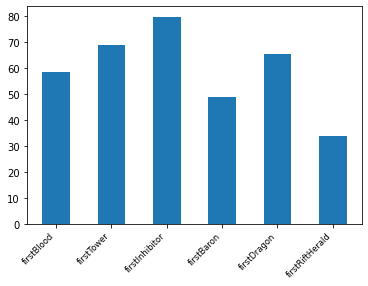

Figure 1


In [3]:
y_values = [round(myutils.get_win_count(game_table, "winner", "firstBlood") * 100, 2), round(myutils.get_win_count(game_table, "winner", "firstTower") * 100, 2),round(myutils.get_win_count(game_table, "winner", "firstInhibitor") * 100, 2),round(myutils.get_win_count(game_table, "winner", "firstBaron") * 100, 2), round(myutils.get_win_count(game_table, "winner", "firstDragon") * 100, 2), round(myutils.get_win_count(game_table, "winner", "firstRiftHerald") * 100, 2)]
myutils.bar_chart(["firstBlood", "firstTower", "firstInhibitor","firstBaron", "firstDragon", "firstRiftHerald"], y_values)

print("Figure 1")


Figure 1 showed that about 80% of games are won with first inhibitor which means that whichever team get the first inhibitor will most likely to win the game. However, about 45% of games are won with first rift herald but that means that the rift herald has less impact on the chance of winning. Notably, this chart only shows which objective has more impact to the win rate. With that in mind, we want to predict which team will likely to win based on the combinations of objectives.       

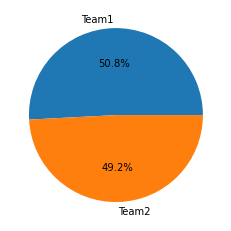

Figure 2


In [4]:
team1, team2 = myutils.team_win_count(game_table, "winner")
myutils.pie_chart(["Team1", "Team2"], [team1, team2])
print("Figure 2")


Look at figure 2, it is interesting that team 1 has a slightly higher win rate regardless of the attributtes that we used. Based on our experience of the game, team 1 has a better path to objectives which let them have a slight advantage over team 2.

# 3. Classification Results

We use train_test_split method to generate X_test, X_train, Y_train, and Y-test then we used KNN, Naive Bayes, and Random Forest classifier to predict whichever team won. The classifiers were developed by following instructions created by Dr. Sprint.

In [5]:
# KNNeightbors
test_size = 2000
X_train, X_test, y_train, y_test = myevaluation.train_test_split(copy.deepcopy(game_X), copy.deepcopy(game_Y), test_size=test_size, shuffle=True)

knn = MyKNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = []
for i, x in enumerate(X_test):
    prediction = knn.predict([x])
    predictions.append(prediction[0])

acc = round(sum([int(x==y) for x,y in zip(predictions, y_test)])/len(predictions), 2)
print("KNN:" )
print("Accuracy = " + str(acc))
print("Error rate = " + str(1-acc))

headers = ["Team", "1", "2", "total", "recognition (%)"]
mat = myevaluation.confusion_matrix(y_test, predictions, [1.0, 2.0])
myutils.build_confusion_matrix(mat)
print("KNN Classifier (Train Test Split)")
print(tabulate(mat, headers))

KNN:
Accuracy = 0.51
Error rate = 0.49
KNN Classifier (Train Test Split)
  Team     1    2    total    recognition (%)
------  ----  ---  -------  -----------------
     1  1014    0     1014                100
     2   986    0      986                  0


Because all our data that was collected was purely categorical, KNN performed extremely poorly and classified every game as a Team 1 win.  

In [7]:
# Naive Bayes Classifier

test_size = 2000
X_train, X_test, y_train, y_test = myevaluation.train_test_split(copy.deepcopy(game_X), copy.deepcopy(game_Y), test_size=test_size, shuffle=True)

nb = MyNaiveBayesClassifier()
nb.fit(X_train, y_train)
predictions = []
for i, x in enumerate(X_test):
    prediction = nb.predict([x])
    predictions.append(prediction[0])
acc = round(sum([int(x==y) for x,y in zip(predictions, y_test)])/len(predictions), 2)
print("Naive Bayes: ")
print("Accuracy = " + str(acc))
print("Error rate = " + str(1-acc))

headers = ["Team", "1", "2", "total", "recognition (%)"]
mat = myevaluation.confusion_matrix(y_test, predictions, [1.0, 2.0])
myutils.build_confusion_matrix(mat)
print("Naive Bayes Classifier (Train Test Split)")
print(tabulate(mat, headers))

Naive Bayes: 
Accuracy = 0.88
Error rate = 0.12
Naive Bayes Classifier (Train Test Split)
  Team    1    2    total    recognition (%)
------  ---  ---  -------  -----------------
     1  908  104     1012              89.72
     2  130  858      988              86.84


The Naive Bayes classifier worked very well with an accuracy of about 88%. Interestingly it's accuracy at predicting a Team 2 win was about 3% less accurate than for predicting a Team 1 win

In [6]:
# Random Forest Classifier

test_size = 2000
X_train, X_test, y_train, y_test = myevaluation.train_test_split(copy.deepcopy(game_X), copy.deepcopy(game_Y), test_size=test_size, shuffle=True)

best_trees = []
with open("best_tree.txt", "r") as data:
    best_trees = ast.literal_eval(data.read())

rf = MyRandomForestClassifier()
rf.trees = copy.deepcopy(best_trees)
predictions = []
for i, x in enumerate(X_test):
    prediction = rf.predict([x])
    predictions.append(prediction[0])

acc = round(sum([int(x==y) for x,y in zip(predictions, y_test)])/len(predictions), 2)
print("Random Forest")
print("Accuracy = ", acc)
print("Error Rate =", str(1-acc))

headers = ["Team", "1", "2", "total", "recognition (%)"]
mat = myevaluation.confusion_matrix(y_test, predictions, [1.0, 2.0])
myutils.build_confusion_matrix(mat)
print("Random Forest Classifier (Train Test Split)")
print(tabulate(mat, headers))

Random Forest
Accuracy =  0.9
Error Rate = 0.09999999999999998
Random Forest Classifier (Train Test Split)
  Team    1    2    total    recognition (%)
------  ---  ---  -------  -----------------
     1  935  102     1037              90.16
     2  106  857      963              88.99


The Random Forest classifier was also extremely accurate, but had the interesting feature of predicting Team 2 wins less accurately than Team 1 wins (though to a much lesser degree).

We determined the best classifier by looking at it's overall accuracy and the recognition between Team 1 wins and Team 2 wins. Because KNN classified all instances as Team 1 wins, it was obvious to us that it was not in the running for best classifier. Naive Bayes and Random Forest were very similar, but Random Forest had higher accuracy and recognition in addition to being much faster to run.

The Random Forest classifier can be accessed through an API interface with this example url: http://league-of-legends-cpsc322-s1.herokuapp.com/predict?first_blood=1&first_tower=1&first_inhib=2&first_baron=1&first_dragon=1&first_riftherald=1

# 4. Conclusion 


Like stated previously, the dataset that we used was purely categorical and had 15,000 instances with six attributes related to objectives in the game League of Legends. 

One challenge for classification is that we did not have any continuous data so using a classifier like KNN simply did not work at all. The classifiers that did work well were Naive Bayes and Random Forest with an 88% and 90% accuracy respectively. We also had memory issues when running our classifiers which appeared to be solved by instead of running the whole jupyter notebook at once run each cell individually. This seemed to reduce the memory strain significantly.

An idea for improvement that we had was to remove the first inhibitor from our data because typically it signified that the game is nearing it's end. It also overwhelmed every other objective so if we gave Team 1 every objective other than the first inhibitor which we gave to Team 2, Team 2 would be classified as the winner. In a real game this would make sense, but the classifiers would be more useful if they were focused earlier on in the game. Another idea we had would be to obtain the total gold per team at 10, 15, and 20 minutes in order to gain an easy idea as to who had an advantage when.